"This dataset was shared with me by a colleague who got it from a colleague.  I found this source http://armstrade.sipri.org/armstrade/page/trade_register.php as a potential generator of the dataset.  The purpose of this excercise is to mainly focus on cleaning the data rather than building a model."

In [1]:
import pandas as pd
df = pd.read_csv('Trade-Register-1950-2019-suppliers copy.txt', delimiter='\t', encoding='utf-8', engine='python' )

In [2]:
df.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,,Year(s),Unnamed: 6,Supplier/,Unnamed: 8,No.,...,No.,Unnamed: 15,recipient (R),ordered,designation,description,of order,delivery,delivered,Comments
0,NaN,NaN,None,None,None,None,None,None,None,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,None,None,None,None,None,None,None,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Albania,None,None,None,None,None,None,None,None,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,R: Burkina Faso,(12),M-43 120mm,Mortar,(2011),2011,12,Probably second-hand,None,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,None,None,None,None,None,None,None,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27035 entries, 0 to 27034
Data columns (total 24 columns):
Unnamed: 0       26898 non-null object
Unnamed: 1       3317 non-null object
Unnamed: 2       26649 non-null object
Unnamed: 3       26762 non-null object
                 26762 non-null object
Year(s)          26685 non-null object
Unnamed: 6       25998 non-null object
Supplier/        25540 non-null object
Unnamed: 8       18901 non-null object
No.              0 non-null float64
Weapon           0 non-null float64
Weapon.1         0 non-null float64
Year             0 non-null float64
of               0 non-null float64
No.              0 non-null float64
Unnamed: 15      0 non-null float64
recipient (R)    0 non-null float64
ordered          0 non-null float64
designation      0 non-null float64
description      0 non-null float64
of order         0 non-null float64
delivery         0 non-null float64
delivered        0 non-null float64
Comments         0 non-null float64
d

In [4]:
df.dropna(how='all', axis=1, inplace=True)

In [5]:
df.head(20)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,,Year(s),Unnamed: 6,Supplier/,Unnamed: 8
0,NaN,NaN,None,None,None,None,None,None,None
1,NaN,NaN,None,None,None,None,None,None,None
2,Albania,None,None,None,None,None,None,None,None
3,R: Burkina Faso,(12),M-43 120mm,Mortar,(2011),2011,12,Probably second-hand,None
4,NaN,NaN,None,None,None,None,None,None,None
5,Algeria,None,None,None,None,None,None,None,None
6,R: Angola,4,N-262 Fregate,Transport aircraft,1980,1980,4,Second-hand; incl for MP,None
7,Nigeria,(2),Il-28,Bomber aircraft,1967,1968,(2),Second-hand,None
8,Western Sahara,(3),BTR-60PB,APC,(2016),2016,(3),Second-hand; aid,None
9,NaN,NaN,None,None,None,None,None,None,None


In [6]:
#all the suppliers come right before the recipients which are indicated by having an R:\n",
#isolating those first:\n",
df['r'] = df.iloc[:,0].str.find('R:')
df.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,,Year(s),Unnamed: 6,Supplier/,Unnamed: 8,r
0,NaN,NaN,None,None,None,None,None,None,None,NaN
1,NaN,NaN,None,None,None,None,None,None,None,NaN
2,Albania,None,None,None,None,None,None,None,None,-1.0
3,R: Burkina Faso,(12),M-43 120mm,Mortar,(2011),2011,12,Probably second-hand,None,0.0
4,NaN,NaN,None,None,None,None,None,None,None,NaN


In [7]:
index = df.index

In [8]:
#idendifying index list of all the recipients
recps = index[df.iloc[:,0].str.find('R:') == 0]
recps

Int64Index([    3,     6,    11,    18,    46,    49,    52,   183,   288,
              291,
            ...
            18060, 18063, 26730, 26952, 26956, 26962, 26974, 26979, 27029,
            27032],
           dtype='int64', length=136)

In [9]:
#dentifying index for all the suppliers\n",
sups = recps -1
sups

Int64Index([    2,     5,    10,    17,    45,    48,    51,   182,   287,
              290,
            ...
            18059, 18062, 26729, 26951, 26955, 26961, 26973, 26978, 27028,
            27031],
           dtype='int64', length=136)

In [10]:
df.rename(columns = {'Unnamed: 0':'sups_recips'}, inplace = True) 

In [11]:
df.insert(0, 'Supplier', value=' ')

In [12]:
df.loc[sups]

,Supplier,sups_recips,Unnamed: 1,Unnamed: 2,Unnamed: 3,,Year(s),Unnamed: 6,Supplier/,Unnamed: 8,r
2,,Albania,None,None,None,None,None,None,None,None,-1.0
5,,Algeria,None,None,None,None,None,None,None,None,-1.0
10,,Angola,None,None,None,None,None,None,None,None,-1.0
17,,Argentina,None,None,None,None,None,None,None,None,-1.0
45,,Armenia,None,None,None,None,None,None,None,None,-1.0
...,...,...,...,...,...,...,...,...,...,...,...
26961,,Venezuela,None,None,None,None,None,None,None,None,-1.0
26973,,Viet Nam,None,None,None,None,None,None,None,None,-1.0
26978,,Yugoslavia,None,None,None,None,None,None,None,None,-1.0
27028,,Zambia,None,None,None,None,None,None,None,None,-1.0


In [13]:
#shifting the values over by pulling the indexes and adjacent values
col= df.loc[sups, ["Supplier", "sups_recips"]].shift(-1, axis=1, fill_value=" ")
col

,Supplier,sups_recips
2,Albania,
5,Algeria,
10,Angola,
17,Argentina,
45,Armenia,
...,...,...
26961,Venezuela,
26973,Viet Nam,
26978,Yugoslavia,
27028,Zambia,


In [14]:
#filling it in
df['Supplier'] = col['Supplier']
df.head()

,Supplier,sups_recips,Unnamed: 1,Unnamed: 2,Unnamed: 3,,Year(s),Unnamed: 6,Supplier/,Unnamed: 8,r
0,NaN,NaN,NaN,None,None,None,None,None,None,None,NaN
1,NaN,NaN,NaN,None,None,None,None,None,None,None,NaN
2,Albania,Albania,None,None,None,None,None,None,None,None,-1.0
3,NaN,R: Burkina Faso,(12),M-43 120mm,Mortar,(2011),2011,12,Probably second-hand,None,0.0
4,NaN,NaN,NaN,None,None,None,None,None,None,None,NaN


In [15]:
#all recipients have null values in Supplier column:
recip1idx = df[df['Supplier'].isnull()].index.tolist()

In [16]:
#filling in all the suppliers 
df['Supplier'].ffill(inplace=True)

In [17]:
#creating a space for the recips to go
df.insert(2, 'Recipient', value=' ')

In [18]:
#shifting the values over by pulling the indexes and adjacent values
col1= df.loc[recip1idx, ["sups_recips", "Recipient"]].shift(1, axis=1, fill_value=" ")

In [19]:
df['Recipient'] = col1['Recipient']

In [20]:
df.drop('sups_recips', axis=1, inplace=True)

In [21]:
#renaming columns since it throws key errors
df.rename(columns = {'Unnamed: 1' :'No','Unnamed: 2':'Weapon', 'Unnamed: 3' : 'Description', " ": 'Year',
                     'Unnamed: 6' : 'Delivered', 'Supplier/':'Comments'},
                     inplace = True)

In [22]:
df.head(20)

,Supplier,Recipient,No,Weapon,Description,Year,Year(s),Delivered,Comments,Unnamed: 8,r
0,NaN,NaN,NaN,None,None,None,None,None,None,None,NaN
1,NaN,NaN,NaN,None,None,None,None,None,None,None,NaN
2,Albania,NaN,None,None,None,None,None,None,None,None,-1.0
3,Albania,R: Burkina Faso,(12),M-43 120mm,Mortar,(2011),2011,12,Probably second-hand,None,0.0
4,Albania,NaN,NaN,None,None,None,None,None,None,None,NaN
5,Algeria,NaN,None,None,None,None,None,None,None,None,-1.0
6,Algeria,R: Angola,4,N-262 Fregate,Transport aircraft,1980,1980,4,Second-hand; incl for MP,None,0.0
7,Algeria,Nigeria,(2),Il-28,Bomber aircraft,1967,1968,(2),Second-hand,None,-1.0
8,Algeria,Western Sahara,(3),BTR-60PB,APC,(2016),2016,(3),Second-hand; aid,None,-1.0
9,Algeria,NaN,NaN,None,None,None,None,None,None,None,NaN


In [23]:
df.head(14)

,Supplier,Recipient,No,Weapon,Description,Year,Year(s),Delivered,Comments,Unnamed: 8,r
0,NaN,NaN,NaN,None,None,None,None,None,None,None,NaN
1,NaN,NaN,NaN,None,None,None,None,None,None,None,NaN
2,Albania,NaN,None,None,None,None,None,None,None,None,-1.0
3,Albania,R: Burkina Faso,(12),M-43 120mm,Mortar,(2011),2011,12,Probably second-hand,None,0.0
4,Albania,NaN,NaN,None,None,None,None,None,None,None,NaN
5,Algeria,NaN,None,None,None,None,None,None,None,None,-1.0
6,Algeria,R: Angola,4,N-262 Fregate,Transport aircraft,1980,1980,4,Second-hand; incl for MP,None,0.0
7,Algeria,Nigeria,(2),Il-28,Bomber aircraft,1967,1968,(2),Second-hand,None,-1.0
8,Algeria,Western Sahara,(3),BTR-60PB,APC,(2016),2016,(3),Second-hand; aid,None,-1.0
9,Algeria,NaN,NaN,None,None,None,None,None,None,None,NaN


In [24]:
shft_recip = df['Recipient'] == '     '
sups_idx = [i for i, true in enumerate(shft_recip) if true]

In [25]:
sups_idx

[13,
 21,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 56,
 58,
 60,
 68,
 69,
 72,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 95,
 97,
 99,
 100,
 104,
 106,
 108,
 109,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 121,
 122,
 123,
 124,
 125,
 129,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 142,
 143,
 144,
 145,
 147,
 149,
 151,
 152,
 156,
 157,
 160,
 161,
 163,
 165,
 168,
 169,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 179,
 187,
 190,
 193,
 196,
 201,
 202,
 203,
 207,
 208,
 209,
 211,
 213,
 217,
 219,
 220,
 222,
 224,
 225,
 227,
 229,
 234,
 236,
 239,
 240,
 241,
 242,
 245,
 248,
 252,
 253,
 254,
 255,
 256,
 260,
 263,
 264,
 266,
 267,
 268,
 269,
 270,
 271,
 273,
 277,
 278,
 279,
 281,
 283,
 284,
 300,
 302,
 303,
 304,
 305,
 306,
 307,
 308,
 309,
 310,
 311,
 312,
 313,
 314,
 315,
 316,
 319,
 320,
 321,
 322,
 323,
 324,
 325,
 328,
 329,
 330,
 331,
 

In [26]:
#reassigning the indexes with the shifted values:
df.loc[sups_idx] = df.loc[sups_idx].shift(-1, axis=1, fill_value=" ")

In [27]:
df.loc[sups_idx]

,Supplier,Recipient,No,Weapon,Description,Year,Year(s),Delivered,Comments,Unnamed: 8,r
13,,NaN,2,T-55,Tank,2002,2002,2,Second-hand; for use against rebels,,
21,,NaN,3,Gem,Turboshaft,1988,1988,3,Second-hand; spares for Lynx helicopters,,
25,,NaN,3,Bouchard,OPV,1964,1964-1968,3,Second-hand,,
26,,NaN,1,G-21 Goose,Light transport ac,(1966),1967,1,Second-hand; aid,,
27,,NaN,1,DHC-3 Otter,Light transport ac,(1970),1972,1,Second-hand; aid,,
...,...,...,...,...,...,...,...,...,...,...,...
27022,,NaN,1,PN-13,Tanker,1969,1969,1,Second-hand but modernized before delivery; Su...,,
27023,,NaN,5,DTM-211,Landing craft,(1990),1991,5,Designation uncertain,,
27025,,NaN,2,G-2A Galeb,Trainer aircraft,1970,1971,2,G-2AE version,,
27026,,NaN,4,J-1 Jastreb,Ground attack ac,1970,1971,4,J-1E version; possibly incl 2 RJ-1E reconnaiss...,,


In [28]:
df.head()

,Supplier,Recipient,No,Weapon,Description,Year,Year(s),Delivered,Comments,Unnamed: 8,r
0,NaN,NaN,NaN,None,None,None,None,None,None,None,NaN
1,NaN,NaN,NaN,None,None,None,None,None,None,None,NaN
2,Albania,NaN,None,None,None,None,None,None,None,None,-1
3,Albania,R: Burkina Faso,(12),M-43 120mm,Mortar,(2011),2011,12,Probably second-hand,None,0
4,Albania,NaN,NaN,None,None,None,None,None,None,None,NaN


In [29]:
df.drop(['Unnamed: 8', 'r'], axis=1, inplace=True)

In [30]:
dfsr = df[['Supplier', 'Recipient']]
dels = dfsr[dfsr['Recipient'].isnull()].index.tolist()

In [31]:
df.drop(dels, axis=0, inplace=True)

In [32]:
df['Recipient'] = df['Recipient'].str.replace('R:', "")

In [33]:
df.head()

,Supplier,Recipient,No,Weapon,Description,Year,Year(s),Delivered,Comments
3,Albania,Burkina Faso,(12),M-43 120mm,Mortar,(2011),2011,12,Probably second-hand
6,Algeria,Angola,4,N-262 Fregate,Transport aircraft,1980,1980,4,Second-hand; incl for MP
7,Algeria,Nigeria,(2),Il-28,Bomber aircraft,1967,1968,(2),Second-hand
8,Algeria,Western Sahara,(3),BTR-60PB,APC,(2016),2016,(3),Second-hand; aid
11,Angola,Congo,1,Noratlas,Transport aircraft,1979,1979,1,Second-hand; aid


In [34]:
df['No'] = df['No'].str.replace('(',"")
df['No'] = df['No'].str.replace(')', "")

In [35]:
df['Year'] = df['Year'].str.replace(')', "")
df['Year'] = df['Year'].str.replace('(',"")

In [36]:
df['Delivered'] = df['Delivered'].str.replace(')', "")
df['Delivered'] = df['Delivered'].str.replace('(',"")

In [37]:
df.head(20)

,Supplier,Recipient,No,Weapon,Description,Year,Year(s),Delivered,Comments
3,Albania,Burkina Faso,12,M-43 120mm,Mortar,2011,2011,12,Probably second-hand
6,Algeria,Angola,4,N-262 Fregate,Transport aircraft,1980,1980,4,Second-hand; incl for MP
7,Algeria,Nigeria,2,Il-28,Bomber aircraft,1967,1968,2,Second-hand
8,Algeria,Western Sahara,3,BTR-60PB,APC,2016,2016,3,Second-hand; aid
11,Angola,Congo,1,Noratlas,Transport aircraft,1979,1979,1,Second-hand; aid
12,Angola,Cote d'Ivoire,2,BMP-2,IFV,2002,2002,2,Second-hand; for use against fight rebels
14,Angola,Guinea-Bissau,1,Do-27,Light aircraft,1980,1980,1,Second-hand; status uncertain
15,Angola,United States,250,FIM-92 Stinger,Portable SAM,1992,1992,250,Second-hand; delivered in 1980s as aid to UNIT...
18,Argentina,Bolivia,37,M-3/M-5 Half-track,APC,2006,2006,37,Second-hand; aid; M-5 and M-9 versions
19,Argentina,Colombia,3,IA-58A Pucara,Ground attack ac,1989,1990,3,Second-hand; aid; for anti-narcotics operations


In [38]:
df.to_csv(r'C:\Users\aosika\Documents\GitHub\GitHub\shifting\arms.csv')

In [39]:
df.groupby('Supplier').get_group('Algeria')['No'].sum()

'423'

In [40]:
df['Recipient'].isnull().sum()

0

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3335 entries, 3 to 27033
Data columns (total 9 columns):
Supplier       3335 non-null object
Recipient      3335 non-null object
No             3317 non-null object
Weapon         3335 non-null object
Description    3335 non-null object
Year           3335 non-null object
Year(s)        3258 non-null object
Delivered      3258 non-null object
Comments       2800 non-null object
dtypes: object(9)
memory usage: 260.5+ KB


In [42]:
len(df.No)

3335

In [43]:
len(df.Delivered)

3335

In [44]:
df['No'].replace('. .', 0, inplace=True)
    

In [45]:
df['Delivered'].replace('. .', 0, inplace=True)

In [46]:
df['No'].astype(str).astype(float).plot()

In [47]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

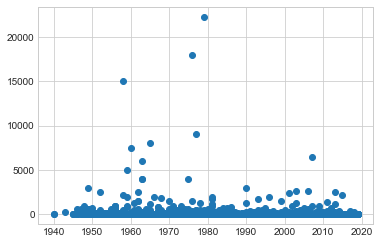

In [48]:
x = df['No'].astype(str).astype(float)
y = pd.to_datetime(df['Year'])

plt.scatter(y,x)

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3335 entries, 3 to 27033
Data columns (total 9 columns):
Supplier       3335 non-null object
Recipient      3335 non-null object
No             3317 non-null object
Weapon         3335 non-null object
Description    3335 non-null object
Year           3335 non-null object
Year(s)        3258 non-null object
Delivered      3258 non-null object
Comments       2800 non-null object
dtypes: object(9)
memory usage: 260.5+ KB


In [50]:
sum(df['Delivered'].astype(float))

nan

In [51]:
df.to_csv('C:\Users\aosika\Documents\GitHub\GitHub\shifting')

ValueError: cannot convert float NaN to integer